In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Get the data for the stock ^IBEX
ibex35_list = ["^IBEX","ANA.MC","ACX.MC","ACS.MC","AENA.MC","AMS.MC","MTS.MC","SAB.MC","BKT.MC","BBVA.MC","CABK.MC","CLNX.MC","COL.MC","ANE.MC","ENG.MC","ELE.MC","FER.MC","FDR.MC","GRF.MC","IAG.MC","IBE.MC","ITX.MC","IDR.MC","LOG.MC","MAP.MC","MEL.MC","MRL.MC","NTGY.MC","RED.MC","REP.MC","ROVI.MC","SCYR.MC","SAN.MC","SLR.MC","TEF.MC","UNI.MC"]

for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [3]:
# Check DataFrame
ibex35 = pd.read_csv("../input/^IBEX.csv",index_col="Date",parse_dates=True)
ibex35.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [4]:
# Check DataFrame tail
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,9409.599609,9463.299805,9401.000000,9461.700195,9461.700195,142296700
2023-11-14,9488.000000,9636.599609,9471.799805,9623.299805,9623.299805,171920600
2023-11-15,9636.099609,9684.900391,9604.000000,9640.700195,9640.700195,161156100
2023-11-16,9652.500000,9710.400391,9652.500000,9667.400391,9667.400391,132367600
2023-11-17,9697.200195,9774.700195,9693.599609,9761.400391,9761.400391,249654700
2023-11-20,9761.200195,9857.000000,9759.700195,9839.000000,9839.000000,144062800
2023-11-21,9832.500000,9858.400391,9801.700195,9827.500000,9827.500000,141826400
2023-11-22,9852.500000,9897.200195,9847.099609,9887.400391,9887.400391,125070100
2023-11-23,9891.000000,9921.099609,9873.900391,9905.500000,9905.500000,111600100


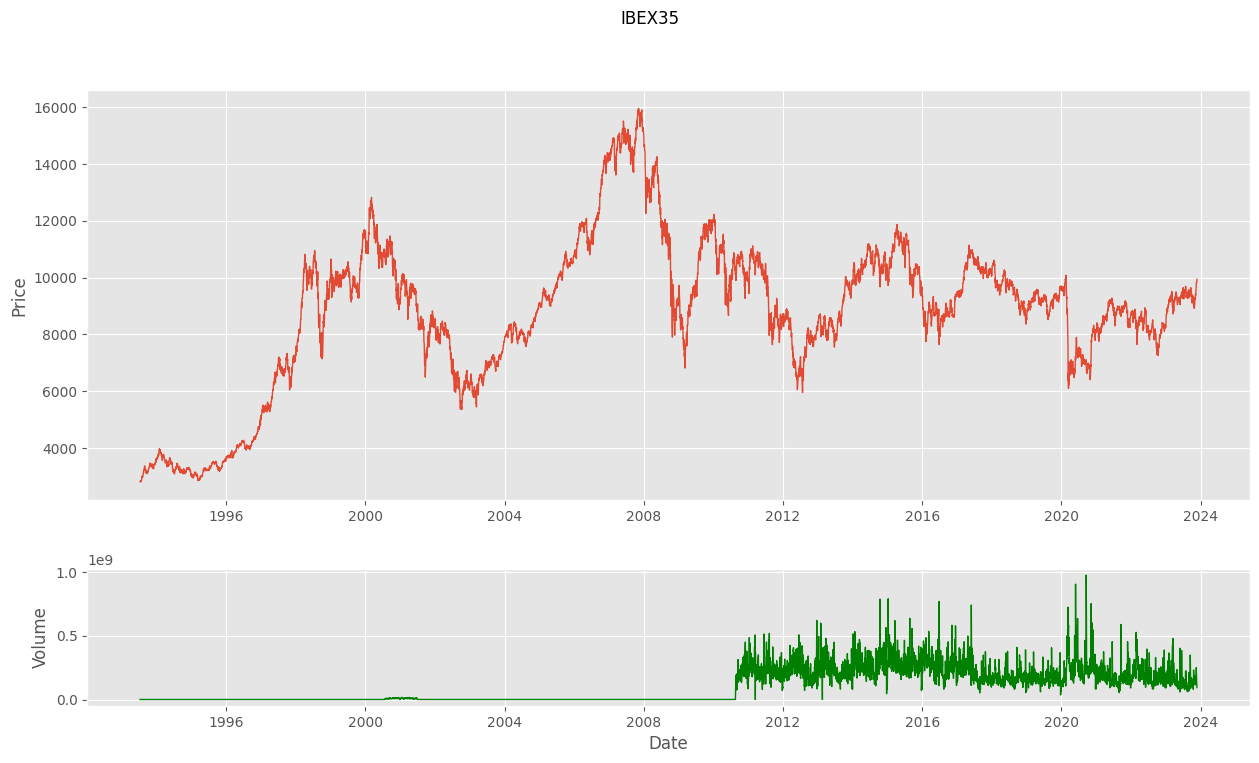

In [5]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()

In [6]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title="IBEX35")

fig.show()

In [7]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
ibex35['MMA20'] = ibex35['Adj Close'].loc['2023'].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=ibex35["Adj Close"].loc['2023'], window=20, window_dev=2)

# Bollinger Bands
ibex35['BB_Upper'] = indicator_bb.bollinger_hband()
ibex35['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=ibex35["Adj Close"].loc['2023'], window=14)

# RSI
ibex35['RSI'] = indicator_rsi.rsi()

# Daily Return
ibex35['Daily_Return'] = daily_return(ibex35["Adj Close"].loc['2023'])

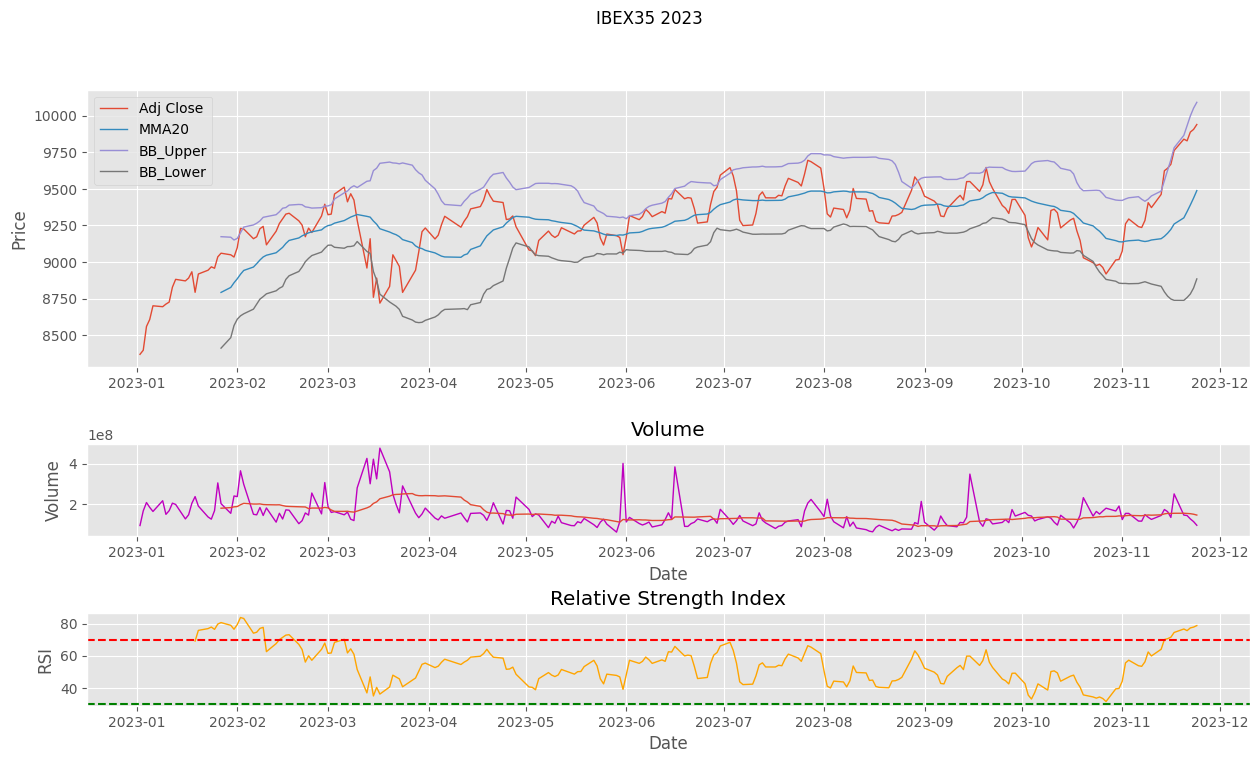

In [8]:
# Plot the adjusted close price of the ^IBEX for 2023
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle("IBEX35 2023")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'].loc['2023'],linewidth=1)
axs[0].plot(ibex35['MMA20'],linewidth=1) 
axs[0].plot(ibex35['BB_Upper'],linewidth=1)
axs[0].plot(ibex35['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(ibex35['Volume'].loc['2023'],linewidth=1,color='m')
axs[1].plot(ibex35['Volume'].loc['2023'].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(ibex35['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [9]:
# Plot the adjusted close price of the ^IBEX for 2023
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=ibex35['Adj Close'].loc['2023'].index,y=ibex35['Adj Close'].loc['2023'],mode="lines",name='IBEX35'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['BB_Lower'].loc['2023'].index,y=ibex35['BB_Lower'].loc['2023'],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['BB_Upper'].loc['2023'].index,y=ibex35['BB_Upper'].loc['2023'],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=ibex35['MMA20'].loc['2023'].index,y=ibex35['MMA20'].loc['2023'],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=ibex35['Volume'].loc['2023'].index,y=ibex35['Volume'].loc['2023'],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=ibex35['Volume'].loc['2023'].index,y=ibex35['Volume'].loc['2023'].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=ibex35['RSI'].loc['2023'].index,y=ibex35['RSI'].loc['2023'],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
#fig.add_trace(go.Scatter(x=ibex35['RSI'].loc['2023'].index,y=,mode="lines",name='30'),row=4, col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title="IBEX35 2023")

fig.show()

In [10]:
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2023-11-13,9409.599609,9463.299805,9401.000000,9461.700195,9461.700195,142296700,9159.230029,9484.463624,8833.996435,63.998369,0.960338
2023-11-14,9488.000000,9636.599609,9471.799805,9623.299805,9623.299805,171920600,9175.470020,9554.831151,8796.108888,70.018141,1.707934
2023-11-15,9636.099609,9684.900391,9604.000000,9640.700195,9640.700195,161156100,9196.870020,9627.095117,8766.644922,70.588410,0.180815
2023-11-16,9652.500000,9710.400391,9652.500000,9667.400391,9667.400391,132367600,9222.900049,9698.464708,8747.335389,71.484681,0.276953
2023-11-17,9697.200195,9774.700195,9693.599609,9761.400391,9761.400391,249654700,9259.515088,9780.364301,8738.665875,74.438022,0.972340
2023-11-20,9761.200195,9857.000000,9759.700195,9839.000000,9839.000000,144062800,9301.690088,9865.062735,8738.317441,76.593248,0.794964
2023-11-21,9832.500000,9858.400391,9801.700195,9827.500000,9827.500000,141826400,9344.275098,9930.951435,8757.598761,75.576281,-0.116882
2023-11-22,9852.500000,9897.200195,9847.099609,9887.400391,9887.400391,125070100,9389.405127,9997.019121,8781.791133,77.269242,0.609518
2023-11-23,9891.000000,9921.099609,9873.900391,9905.500000,9905.500000,111600100,9436.540137,10050.690194,8822.390080,77.770644,0.183057


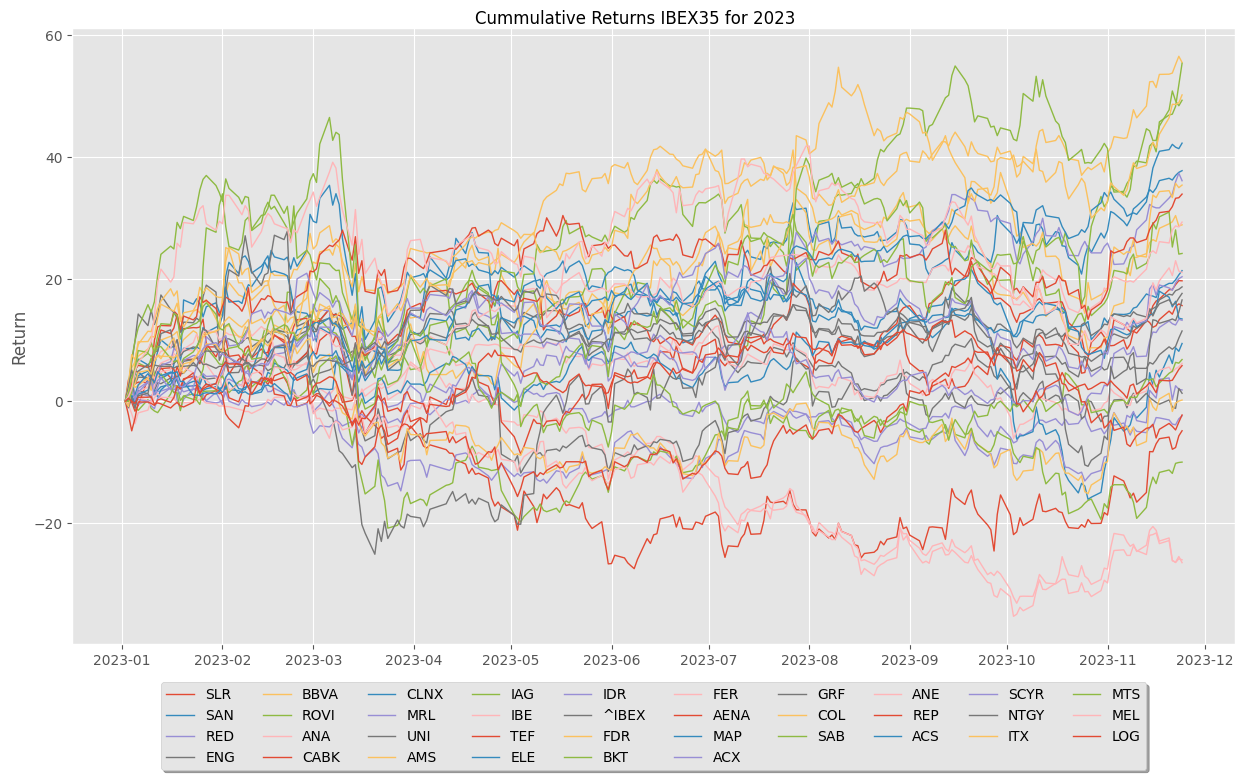

In [11]:
# Plot Cummulative Returns ^IBEX for 2023
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle("Cummulative Returns IBEX35 for 2023")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year 2023
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc['2023'])
    axs.plot(df['Cummulative_Return'].loc['2023'],linewidth=1)
    labels.append(filename.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [12]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year 2023
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc['2023'])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc['2023'].index,y=df['Cummulative_Return'].loc['2023'],mode="lines",name=filename.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title="Cummulative Returns IBEX35 for 2023")

fig.show()